# Summary

```Objective```

How to get weights of the network in logs/* that are trained

예제: PixelGAN 에서 네트워크 weight 받고 돌려보기

```Methods```

todo

```Results```

todo

# Config

# Libs

In [23]:
%load_ext autoreload
%autoreload 2

from misalign.models.cgan_module import CycleGANModule # this is the model
from misalign.models.cobigan_module import COBIGANModule # this is the model

import torch
from misalign.data.IXI_datamodule import IXIDataModule
from monai.visualize import matshow3d
from misalign.draw import blend_and_transpose
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Analysis

path exists for /home/kanghyun/misalign-benchmark/data/IXI/train/prepared_data_0_0.h5
path exists for /home/kanghyun/misalign-benchmark/data/IXI/val/prepared_data_0.0_0.0.h5
path exists for /home/kanghyun/misalign-benchmark/data/IXI/test/prepared_data_0.0_0.0.h5
torch.Size([1, 1, 256, 256]) torch.Size([1, 1, 256, 256])


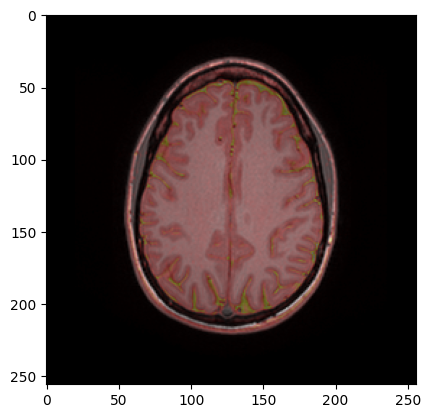

In [4]:
misalign_x = 0
misalign_y = 0

_ = IXIDataModule('/home/kanghyun/misalign-benchmark/data/IXI', batch_size=1, misalign_x=misalign_x, misalign_y=misalign_y)
_.prepare_data()
_.setup()
train_data = _.train_dataloader()

for a, b in train_data:
    print(a.shape, b.shape)
    break

for _a, _b in zip(a,b):
    blended_img = blend_and_transpose(_a[0], _b[0])
    plt.imshow(blended_img)
    plt.show()
    break

_a = torch.Tensor(_a)
_b = torch.Tensor(_b)


In [24]:
#model = CycleGANModule.load_from_checkpoint("/home/kanghyun/misalign-benchmark/logs/Model_cgan_Data_IXI_Misalign_X0_Y2/['train']/runs/2023-07-03_17-44-47/checkpoints/last.ckpt", map_location='cuda:0')
model = COBIGANModule.load_from_checkpoint("/home/kanghyun/misalign-benchmark/logs/Model_cobigan_Data_IXI_Misalign_X0_Y0/['train']/runs/2023-06-30_17-22-05/checkpoints/epoch_epoch=068.ckpt", map_location='cuda:0')
# checkpoint의 위치 가져오기 (map_location to cuda:0 으로 해야 cuda:0 으로 모델 로드)


/home/kanghyun/miniconda3/envs/misalign/lib/python3.9/site-packages/lightning/pytorch/utilities/migration/utils.py:51: PossibleUserWarning: The loaded checkpoint was produced with Lightning v2.0.4, which is newer than your current Lightning version: v2.0.3
  rank_zero_warn(
/home/kanghyun/miniconda3/envs/misalign/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kanghyun/miniconda3/envs/misalign/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/kanghyun/miniconda3/envs/misalign/lib/pyth

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()
with torch.no_grad():
    synth_b, synth_a = model(_a[None].to(device), _b[None].to(device)) # 이렇게 forward 돌리면 나옴

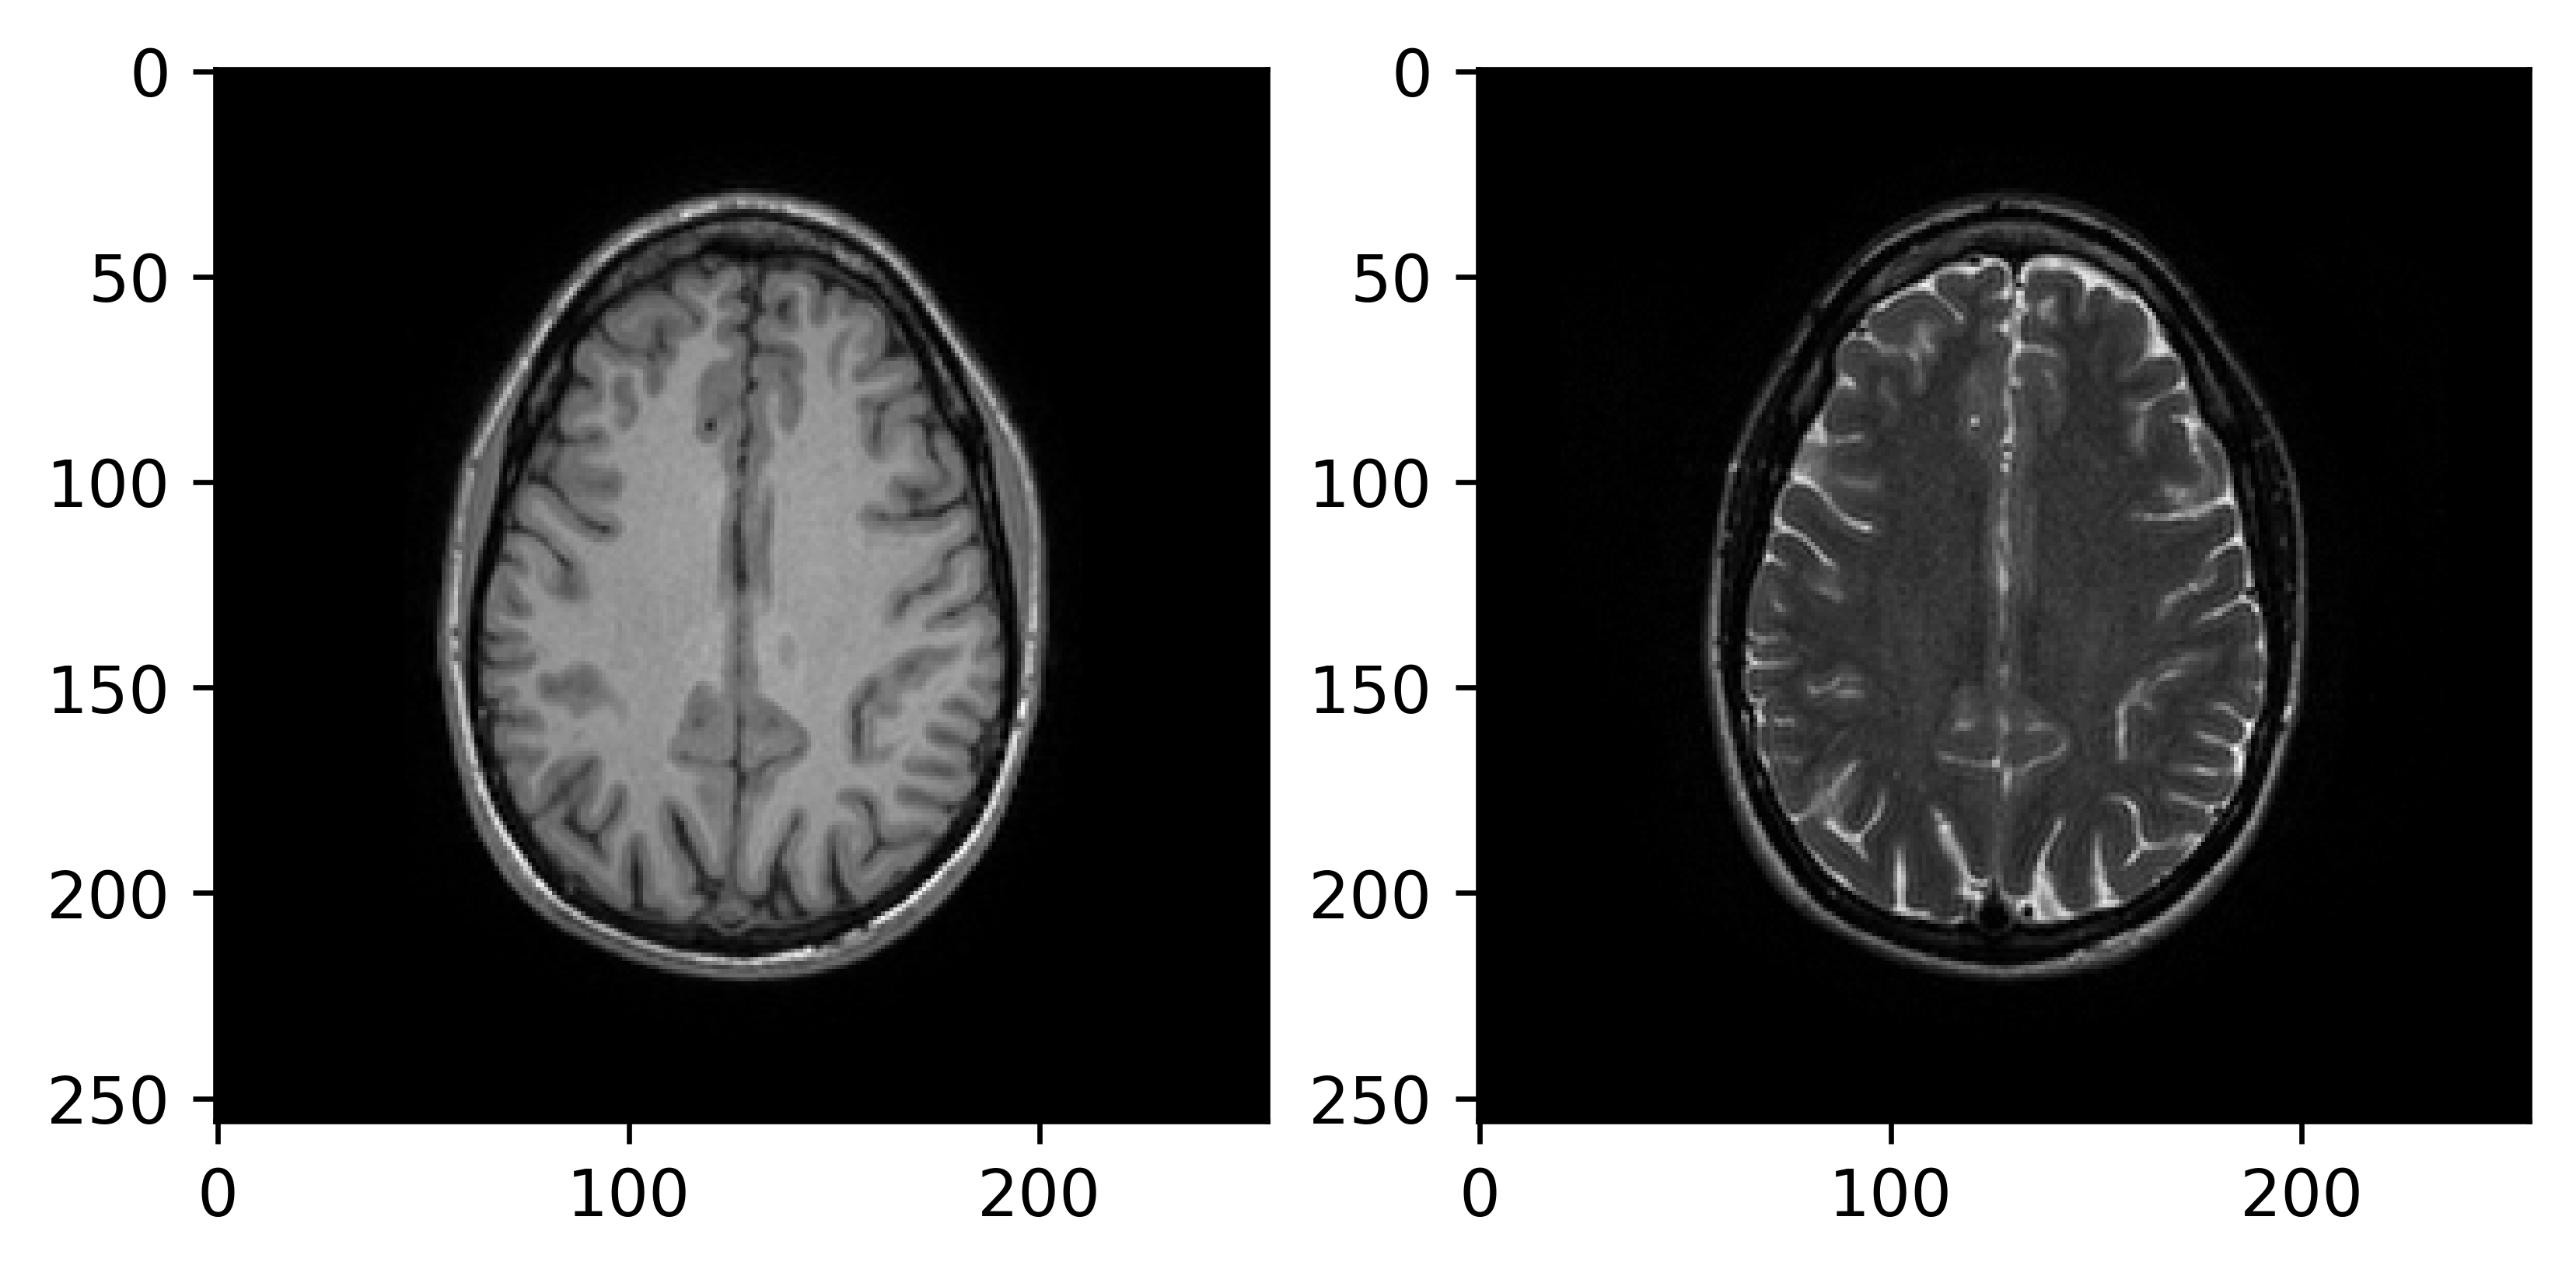

In [27]:
plt.figure(dpi=600)
plt.subplot(1,2,1)
plt.imshow(_a[0].cpu().detach().numpy(), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(_b[0].cpu().detach().numpy(), cmap='gray')


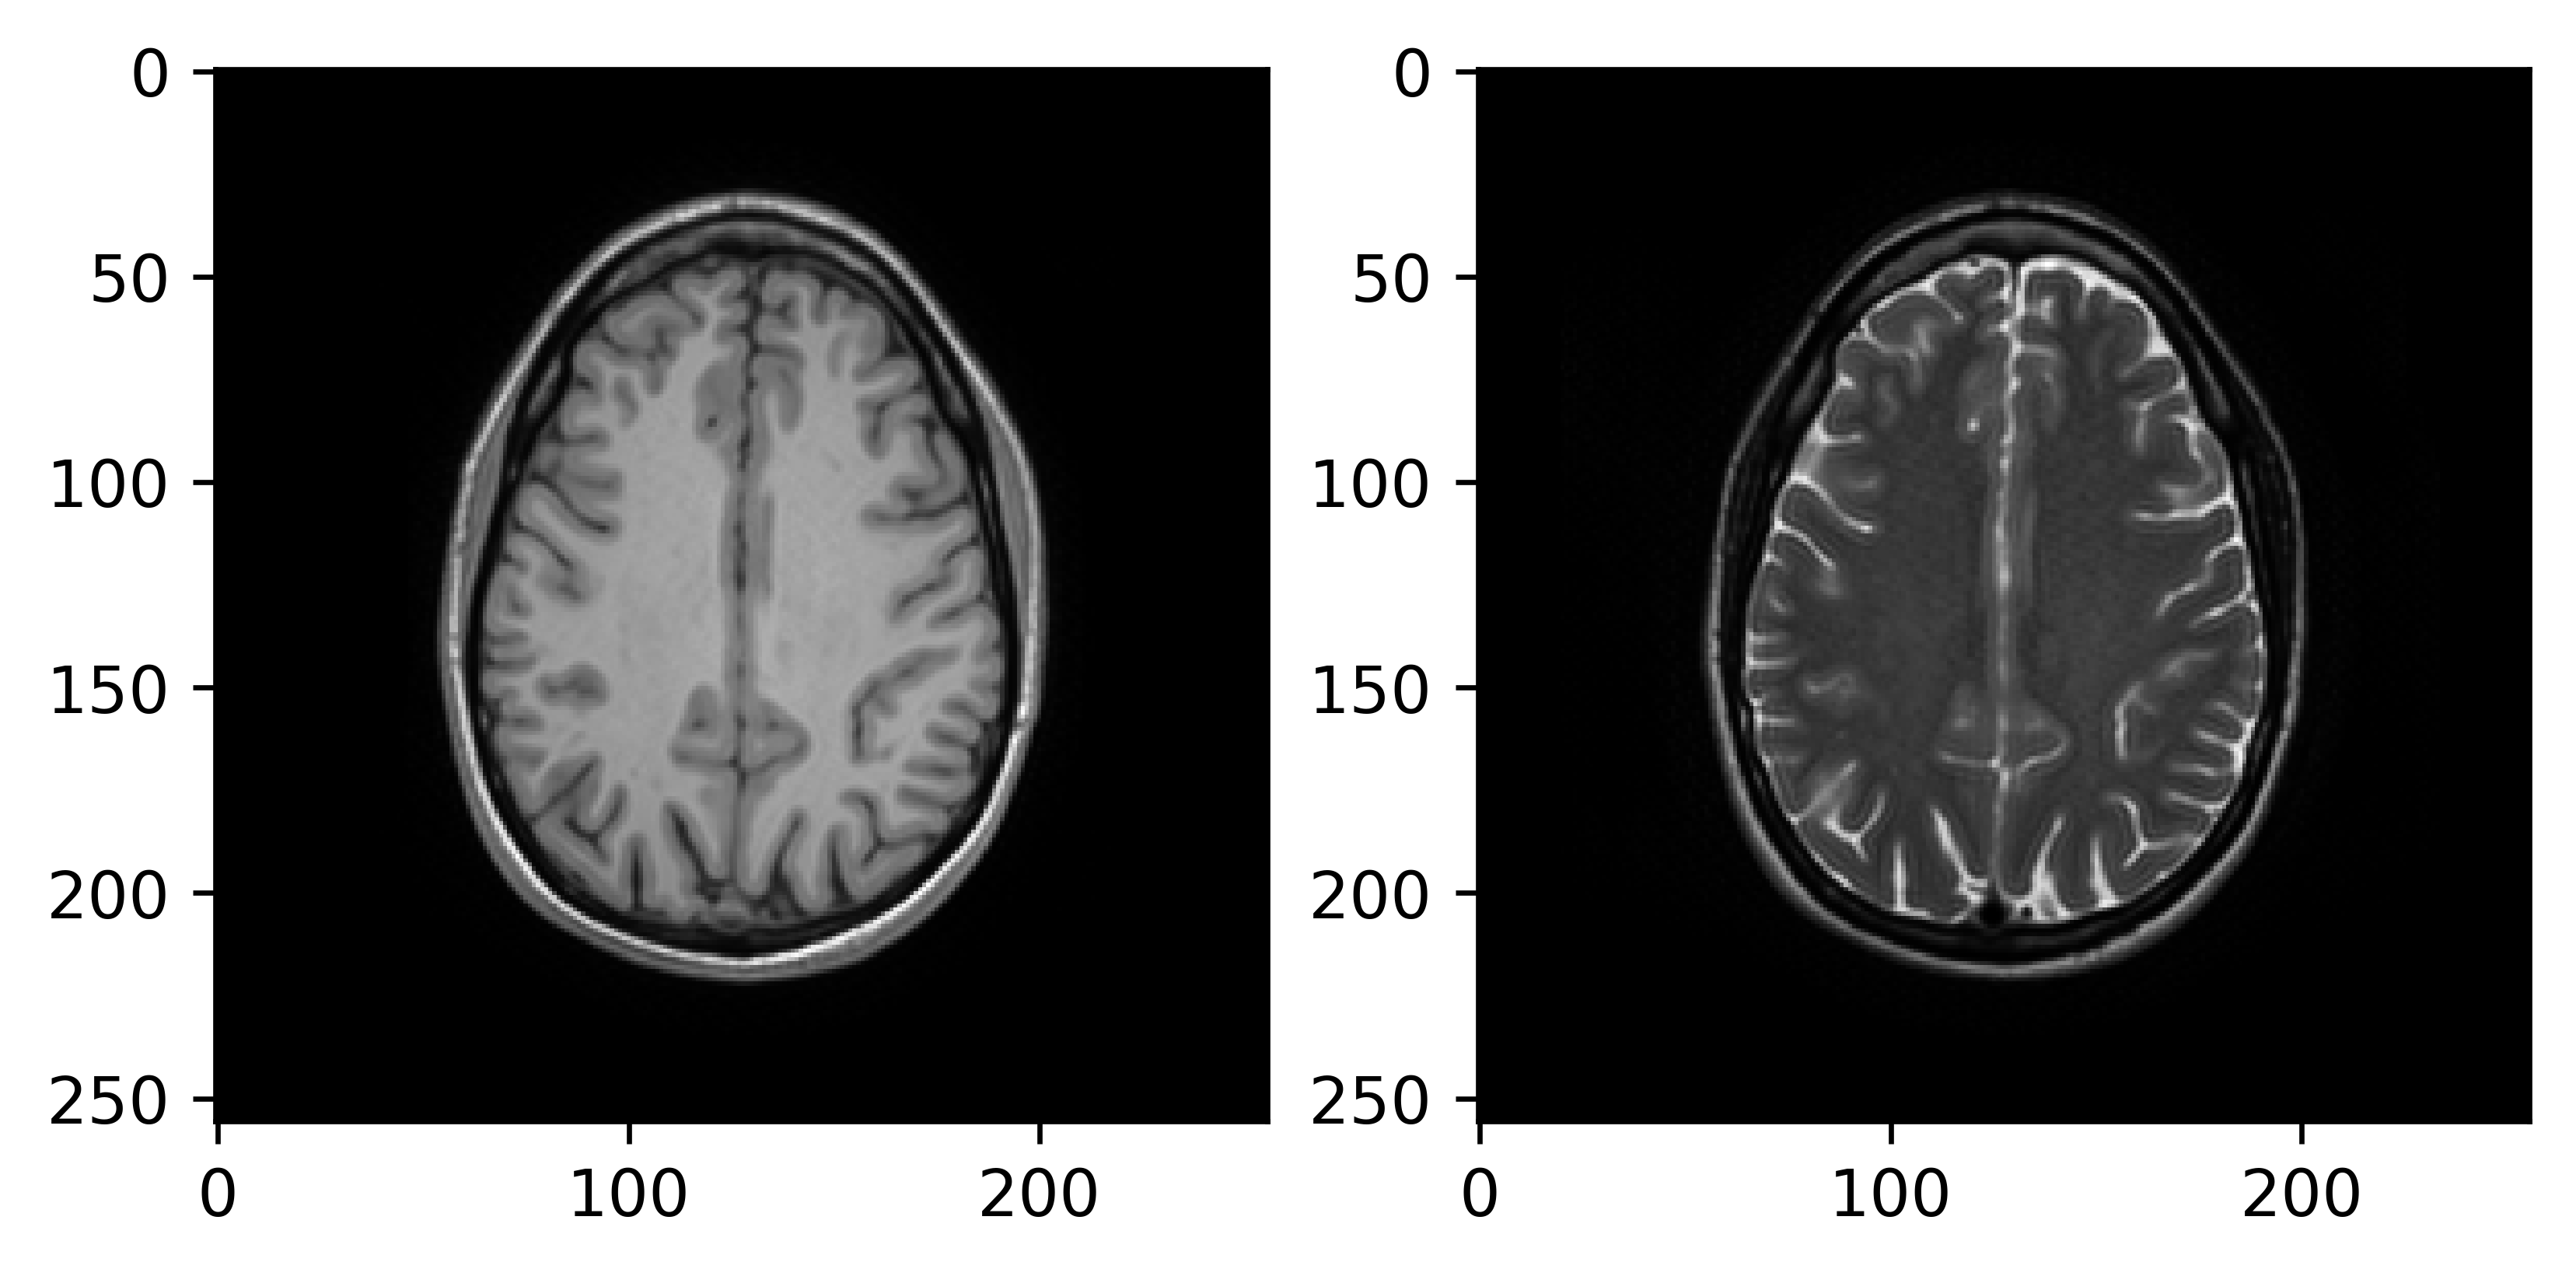

In [28]:
plt.figure(dpi=600)
plt.subplot(1,2,1)
plt.imshow(synth_a[0,0].cpu().detach().numpy(), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(synth_b[0,0].cpu().detach().numpy(), cmap='gray')
